In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

ticker_symbol = "AAPL"

stock_data = yf.download(ticker_symbol, start='2014-01-01', end='2025-10-01')

stock_data.head()

C:\Users\mhoar\AppData\Local\Temp\ipykernel_44380\1084400580.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start='2014-01-01', end='2025-10-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [50]:
# Data Preprocessing
stock_data['sma_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['sma_200'] = stock_data['Close'].rolling(window=200).mean()

In [51]:
stock_data.tail()

Price,Close,High,Low,Open,Volume,sma_50,sma_200
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2025-09-26,109712.828125,110359.195312,108728.976562,109041.296875,57738288949,114060.211094,104167.071133
2025-09-27,109681.945312,109778.500000,109144.296875,109707.140625,26308042910,113920.075469,104301.169805
2025-09-28,112122.640625,112375.484375,109236.945312,109681.945312,33371048505,113832.521094,104443.171211
2025-09-29,114400.382812,114473.570312,111589.953125,112117.875000,60000147466,113734.393594,104609.839609
2025-09-30,114056.085938,114836.617188,112740.562500,114396.523438,58986330258,113640.886406,104760.274531


In [52]:
# Generate buy/sell signals
stock_data['signal'] = 0
buy_signals = (stock_data['sma_50'] > stock_data['sma_200']) & (stock_data['sma_50'].shift(1) <= stock_data['sma_200'].shift(1))
stock_data.loc[buy_signals, 'signal'] = 1

sell_signals = (stock_data['sma_50'] < stock_data['sma_200']) & (stock_data['sma_50'].shift(1) >= stock_data['sma_200'].shift(1))
stock_data.loc[sell_signals, 'signal'] = -1

stock_data.tail()

Price,Close,High,Low,Open,Volume,sma_50,sma_200,signal
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2025-09-26,109712.828125,110359.195312,108728.976562,109041.296875,57738288949,114060.211094,104167.071133,0
2025-09-27,109681.945312,109778.500000,109144.296875,109707.140625,26308042910,113920.075469,104301.169805,0
2025-09-28,112122.640625,112375.484375,109236.945312,109681.945312,33371048505,113832.521094,104443.171211,0
2025-09-29,114400.382812,114473.570312,111589.953125,112117.875000,60000147466,113734.393594,104609.839609,0
2025-09-30,114056.085938,114836.617188,112740.562500,114396.523438,58986330258,113640.886406,104760.274531,0


In [53]:
position = 0
capital = 10000

for i in range(len(stock_data)):
    if stock_data['signal'].iloc[i] == 1 and position != 1:
        position = 1
        capital -= stock_data['Close'].iloc[i]
        print(f"Buy at {stock_data['Close'].iloc[i]} on {stock_data.index[i]}")

    elif stock_data['signal'].iloc[i] == -1 and position != -1:
        position = -1
        capital = position * stock_data['Close'].iloc[i]
        print(f"Sell at {stock_data['Close'].iloc[i]} on {stock_data.index[i]}")
        

Buy at Ticker
BTC-USD    287.463989
Name: 2015-07-14 00:00:00, dtype: float64 on 2015-07-14 00:00:00
Sell at Ticker
BTC-USD    230.643997
Name: 2015-09-14 00:00:00, dtype: float64 on 2015-09-14 00:00:00
Buy at Ticker
BTC-USD    304.618011
Name: 2015-10-28 00:00:00, dtype: float64 on 2015-10-28 00:00:00
Sell at Ticker
BTC-USD    6890.52002
Name: 2018-03-30 00:00:00, dtype: float64 on 2018-03-30 00:00:00
Buy at Ticker
BTC-USD    5464.866699
Name: 2019-04-24 00:00:00, dtype: float64 on 2019-04-24 00:00:00
Sell at Ticker
BTC-USD    9244.972656
Name: 2019-10-26 00:00:00, dtype: float64 on 2019-10-26 00:00:00
Buy at Ticker
BTC-USD    9633.386719
Name: 2020-02-19 00:00:00, dtype: float64 on 2020-02-19 00:00:00
Sell at Ticker
BTC-USD    6681.062988
Name: 2020-03-25 00:00:00, dtype: float64 on 2020-03-25 00:00:00
Buy at Ticker
BTC-USD    9081.761719
Name: 2020-05-21 00:00:00, dtype: float64 on 2020-05-21 00:00:00
Sell at Ticker
BTC-USD    35615.871094
Name: 2021-06-19 00:00:00, dtype: float64 o

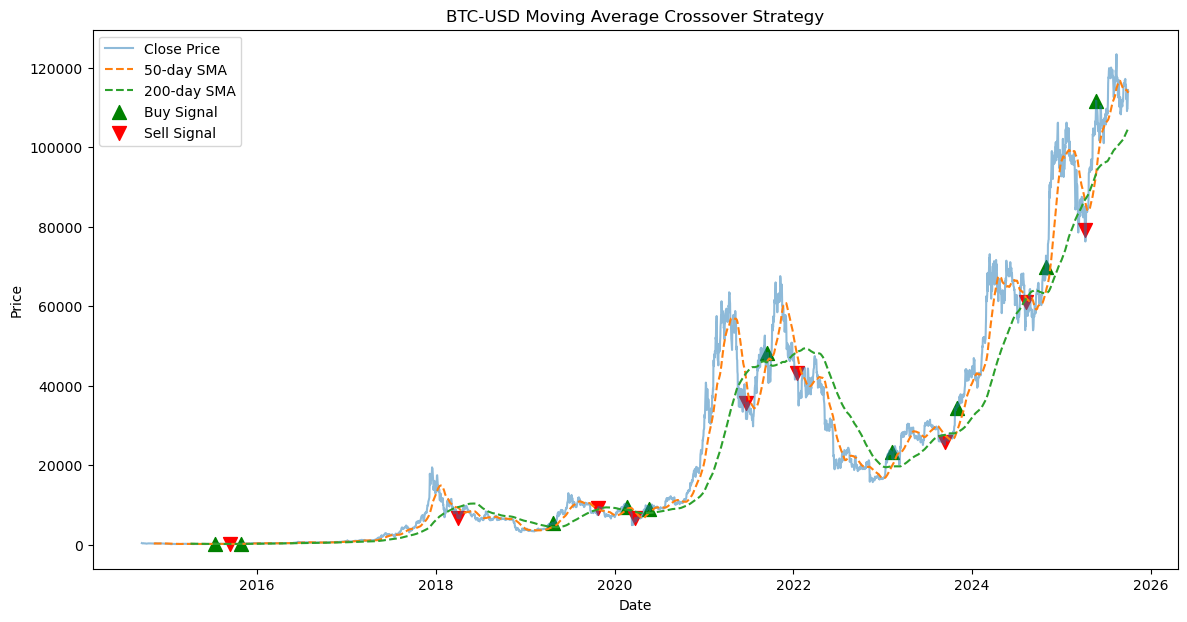

In [54]:
# Plotting trading signals

# Plot closing price and SMAs
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['sma_50'], label='50-day SMA', linestyle='--')
plt.plot(stock_data['sma_200'], label='200-day SMA', linestyle='--')

# Plot buy signals
plt.scatter(stock_data.index[stock_data['signal'] == 1], stock_data['Close'][stock_data['signal'] == 1], 
                label='Buy Signal', marker='^', color='green', s=100)

# Plot sell signals
plt.scatter(stock_data.index[stock_data['signal'] == -1], stock_data['Close'][stock_data['signal'] == -1], 
                label='Sell Signal', marker='v', color='red', s=100)

plt.title(f"{ticker_symbol} Moving Average Crossover Strategy")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
